In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.stats import norm

In [2]:
## funções auxiliares
def dB(x):
    "Converte escalar para dB"
    return 10 * np.log10(x)


def dBm(x):
    "Converte escalar para dB"
    return 10 * np.log10(x/0.001)


def escalar(x):
    "Converte dB para escalar"
    return 10 ** (x / 10)


def LogDistancia(d, PRd0, d0, n):
    "Modelo de perda de percurso logaritmica"
    logd = PRd0 - 10 * n * np.log10(d / d0)
    return dBm(logd)


def eq_espaco_livre(Pt, Gt, Gr, fc, d):
    lambd = 3*10**8 / fc
    Pr = (Pt * Gt * Gr * (lambd**2)) / (((4 * np.pi) ** 2) * (d**2))
    Pr_dbm = float(dBm(Pr))
    return Pr_dbm

#### Aluno: Davi Grumiche Seemann(19206685)

### Tarefa 1

Suponha o seguinte conjunto de medidas, onde $d_0 = 1 \, \text{m}$, $P_t = 2 \, \text{mW}$ e $f_c = 1.8 \, \text{GHz}$. Estime um modelo de perda de propagação do tipo **log-distância**, assumindo espaço-livre para determinar $P_r(d_0)$.

<div style="text-align: center;">

| Distância (m) | $P_r$ (dBm) |
|---------------|-------------|
| 10            | -65         |
| 20            | -72         |
| 50            | -87         |
| 100           | -105        |
| 300           | -128        |
</div>

- Determine uma estimativa para $P_r(d = 200)$.
- Trace uma curva para o modelo até $d = 1 \, \text{km}$.


In [3]:
d0 = 1 # m
Pt = 0.002 # mW
fc = 1.8*10**9# Hz

distancias = np.array([10,20,50,100,300])
Pr_medido = np.array([-65, -72, -87, -105, -128])

In [4]:
PR_d0 = eq_espaco_livre(Pt, 1, 1, fc, d0)
PR_d0

-34.53692233147498

Logo o modelo pode ser representado por:

$$
P_r(d) = -34.536 - 10 \cdot n \cdot \log_{10}\left(d\right)
$$

Para encontrar o valor de n será necessário utilizar o método dos mínimos quadrados. Onde utilizaremos a seguinte função de custo:

$$
F(n) = \sum_{i=1}^{N} \left(P_r(d_i) - P_medido(d_i)\right)^2
$$

Sendo $N$ o número de pontos medidos e $P_medido(d_i)$ o valor medido de $P_r$ para a distância $d_i$. Subistituindo os valores temos:

$$
F(n) = \sum_{i=1}^{5} \left(P_r(d_i) - \left(-34.536 - 10 \cdot n \cdot \log_{10}\left(d_i\right)\right)\right)^2
$$

Para encotrar o melhor valor de $n$ vamos encontrar o menor valor de $F(n)$. Para isso vamos derivar $F(n)$ em relação a $n$ e igualar a zero:

In [5]:
# Função para calcular o erro quadrático F(n)
def erro_quadratico(n, distancia, pr_medido, p0=PR_d0):
    pr_modelo = p0 - 10 * n * np.log10(distancia)
    return np.sum((pr_medido - pr_modelo) ** 2)


# Minimizar a função erro_quadratico para encontrar o valor de n que minimiza o erro
resultado = minimize(erro_quadratico, x0=[2], args=(distancias, Pr_medido))

# Valor ótimo de n
n_otimo = resultado.x[0]

# Exibir os resultados
print(f"Valor ótimo de n: {n_otimo:.4f}")

Valor ótimo de n: 3.4411


Logo o modelo pode ser representado por:

$$
P_r(d) = -34.536 - 10 \cdot 3.4411 \cdot \log_{10}\left(d\right)

In [6]:
def pr_modelo(d_modelo):
    return -34.536 - 10 * 3.4411 * np.log10(d_modelo)

pr_modelo(200)

np.float64(-113.71674318079326)

Calculando para um d=200m:

$$
P_r(200) = -34.536 - 10 \cdot 3.4411 \cdot \log_{10}\left(200\right) = -113.7167
$$

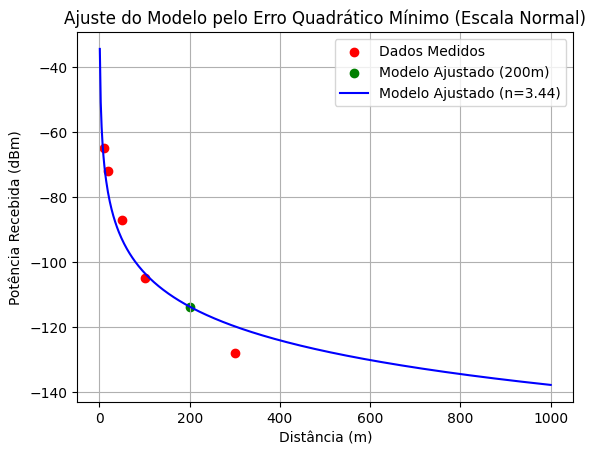

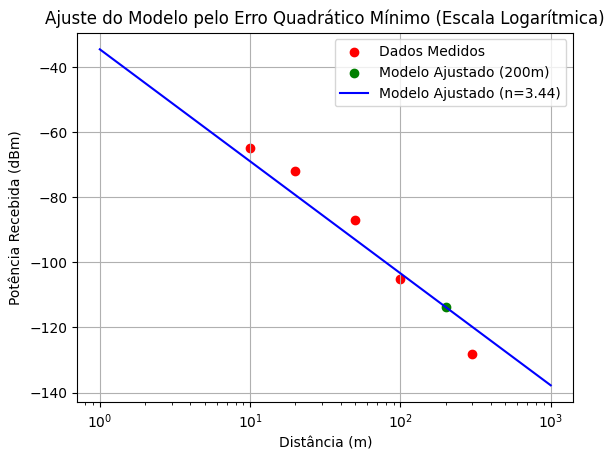

In [7]:
# Plotar o ajuste
d_modelo = np.linspace(1, 1000, 500)

# Calcular o valor de Pr para o modelo ajustado
pr_modelo_plot = pr_modelo(d_modelo)

# Plotar o ajuste em escala normal
plt.figure()
plt.scatter(distancias, Pr_medido, label="Dados Medidos", color="red")
plt.scatter(200, pr_modelo(200), label="Modelo Ajustado (200m)", color="green")
plt.plot(
    d_modelo, pr_modelo_plot, label=f"Modelo Ajustado (n={n_otimo:.2f})", color="blue"
)
plt.xlabel("Distância (m)")
plt.ylabel("Potência Recebida (dBm)")
plt.legend()
plt.grid(True)
plt.title("Ajuste do Modelo pelo Erro Quadrático Mínimo (Escala Normal)")
plt.show()

# Plotar o ajuste em escala logarítmica
plt.figure()
plt.scatter(distancias, Pr_medido, label="Dados Medidos", color="red")
plt.scatter(200, pr_modelo(200), label="Modelo Ajustado (200m)", color="green")

plt.plot(
    d_modelo, pr_modelo_plot, label=f"Modelo Ajustado (n={n_otimo:.2f})", color="blue"
)
plt.xscale("log")
plt.xlabel("Distância (m)")
plt.ylabel("Potência Recebida (dBm)")
plt.legend()
plt.grid(True)
plt.title("Ajuste do Modelo pelo Erro Quadrático Mínimo (Escala Logarítmica)")
plt.show()

## TAREFA 2

Partindo dos dados do problema:

In [8]:
fc_2 = 900e6 # Hz
n_2 = 3
d0_2 = 1 # m
sigma_X_2 = 6 # dB
SNR_min_2 = 5 # dB
Pr_2 = -45 # dBm
Pr_min = -45 + SNR_min_2 # dBm
Pt_2 = 10 # W
Gt_2 = Gr_2 = 5 # dB
T90 = 0.9 # 90% de certeza

PL_d = dBm(Pt_2) - Pr_min
PL_d

np.float64(80.0)

In [9]:
Pr_Do_2 = eq_espaco_livre(Pt_2, escalar(Gt_2), escalar(Gr_2), fc_2, d0_2)

PL_do = dBm(Pt_2) - Pr_Do_2
print(f"O valor de PL(d0) encontrado:{PL_do}")

O valor de PL(d0) encontrado:21.526622374835174


Agora que temos os valores de $P_r(d_0)$ e $P_L(d_0)$ podemos usar o Modelo Log distância para encontrar o valor de $d$:

$$
𝑃_l(d)=𝑃𝐿(𝑑_0) + 10 \cdot 𝑛 \cdot 𝑙𝑜𝑔{10}(𝑑)
$$

In [10]:
d = 10**((80-21.52) / (10 * 3))
d

88.98838669186172

Substituindo os valores:

$$
80 = 21.52 + 30 \cdot \log_{10}\left(d\right) \\
d = 88.9 m
$$

O problema pede para que tenha pelo menos 90% do tempo o requisito seja alcançado, logo, temos que calcular esta distancia máxima. Usando o modelo Log distância com a variável gausseana:

$$
P_L(d) = P_L(d_0) + 10 \cdot n \cdot \log_{10}\left(d\right) + X
$$

In [11]:
# Percentil para 90% de confiabilidade (valor z para 90% da distribuição normal)
z_90 = norm.ppf(T90)  # O valor z para 90% de confiabilidade

# Calcular X para 90% de tempo
X = z_90 * sigma_X_2
print(f"O valor de X para 90% de confiabilidade é: {X:.2f} dB")

O valor de X para 90% de confiabilidade é: 7.69 dB


Agora que temos os valores de $P_r(d_0)$ e $P_L(d_0)$ podemos usar o Modelo Log distância para encontrar o valor de $d$:

$$
𝑃_l(d)=𝑃𝐿(𝑑_0) + 10 \cdot 𝑛 \cdot 𝑙𝑜𝑔{10}(𝑑) + X
$$

Encontrou-se que o valor de X para 90% de confiabilidade é de 7.69 dB. Substituindo os valores:

$$
𝑃_l(d)=𝑃𝐿(𝑑_0) + 10 \cdot 𝑛 \cdot 𝑙𝑜𝑔{10}(𝑑) + 7.69
$$

Resolvendo para encontrar a distancia $d$:

$$
80 = 21.52 + 30 \cdot \log_{10}\left(d\right) + 7.69 \\
d = 49.3173
$$

In [12]:
d = 10 ** ((80 - 21.52-7.69) / (10 * 3))
d

49.31738039549362

A adição do termo $X$ fez com que a distância fosse reduzida para 49.3173m. Podemos notar a importância de se considerar a variável gausseana para a modelagem de sistemas de comunicação, conseguindo se aproximar mais da realidade.

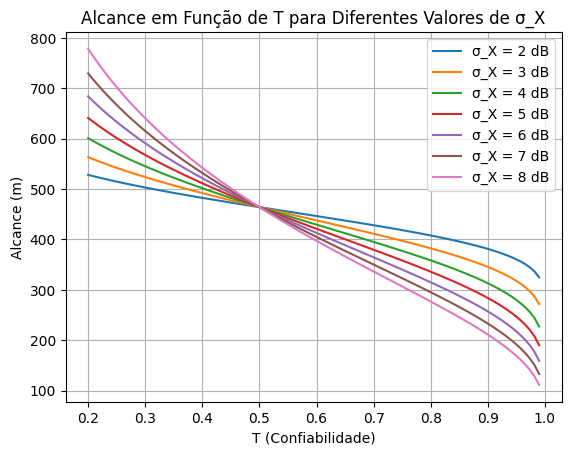

In [13]:
def alcance(d0, n, PL_d, T, sigma_X):
    z = norm.ppf(T)
    X = z * sigma_X
    return d0 * (10 ** ((PL_d - X) / (10 * n)))

T_plot = np.linspace(0.2, 0.99, 100)

alcance_2 = alcance(d0_2, n_2, PL_d, T_plot, 2)
alcance_3 = alcance(d0_2, n_2, PL_d, T_plot, 3)
alcance_4 = alcance(d0_2, n_2, PL_d, T_plot, 4)
alcance_5 = alcance(d0_2, n_2, PL_d, T_plot, 5)
alcance_6 = alcance(d0_2, n_2, PL_d, T_plot, 6)
alcance_7 = alcance(d0_2, n_2, PL_d, T_plot, 7)
alcance_8 = alcance(d0_2, n_2, PL_d, T_plot, 8)

# Plotar o alcance em função do T

plt.figure()
plt.plot(T_plot, alcance_2, label="σ_X = 2 dB")
plt.plot(T_plot, alcance_3, label="σ_X = 3 dB")
plt.plot(T_plot, alcance_4, label="σ_X = 4 dB")
plt.plot(T_plot, alcance_5, label="σ_X = 5 dB")
plt.plot(T_plot, alcance_6, label="σ_X = 6 dB")
plt.plot(T_plot, alcance_7, label="σ_X = 7 dB")
plt.plot(T_plot, alcance_8, label="σ_X = 8 dB")
plt.xlabel("T (Confiabilidade)")
plt.ylabel("Alcance (m)")
plt.legend()
plt.grid(True, which="both")
plt.title("Alcance em Função de T para Diferentes Valores de σ_X")
plt.show()

Mais um ponto para observar sobre o impacto das variáveis gauseanas é a relação entre o alcance e a confiabilidade. Para isso, foi feito um gráfico com o alcance em função da confiabilidade para diferentes valores de $σ_X$.
Nota-se que o Alcance diminui quanto mais confiabilidade é requerida o que se é esperado. Também quanto maior o σX, menor será o alcance obtido para valores de T ≥ 50% e o inverso para T ≤ 50%.